In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [9]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

[INFO] accessing MNIST...


In [10]:
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 32 * 32 * 3))
testX = testX.reshape((testX.shape[0], 32 * 32 * 3))

In [11]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [12]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [15]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [16]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=256)

[INFO] training network...
Epoch 1/100


2023-09-13 12:19:30.991660: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


186/196 [===========================>..] - ETA: 0s - loss: 2.3104 - accuracy: 0.1436

2023-09-13 12:19:41.969410: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


196/196 [==============================] - 8s 8ms/step - loss: 2.3093 - accuracy: 0.1456 - val_loss: 2.2846 - val_accuracy: 0.1970
Epoch 2/100
196/196 [==============================] - 1s 5ms/step - loss: 2.2774 - accuracy: 0.1957 - val_loss: 2.2690 - val_accuracy: 0.2263
Epoch 3/100
196/196 [==============================] - 1s 5ms/step - loss: 2.2621 - accuracy: 0.2169 - val_loss: 2.2538 - val_accuracy: 0.2470
Epoch 4/100
196/196 [==============================] - 1s 5ms/step - loss: 2.2464 - accuracy: 0.2337 - val_loss: 2.2370 - val_accuracy: 0.2486
Epoch 5/100
196/196 [==============================] - 1s 5ms/step - loss: 2.2296 - accuracy: 0.2436 - val_loss: 2.2198 - val_accuracy: 0.2437
Epoch 6/100
196/196 [==============================] - 1s 7ms/step - loss: 2.2115 - accuracy: 0.2486 - val_loss: 2.2007 - val_accuracy: 0.2573
Epoch 7/100
196/196 [==============================] - 1s 5ms/step - loss: 2.1918 - accuracy: 0.2574 - val_loss: 2.1806 - val_accuracy: 0.2716
Epoch 8/100

In [17]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
57/79 [====================>.........] - ETA: 0s

2023-09-13 12:22:03.862180: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.43      0.49      0.45      1000
           1       0.43      0.47      0.45      1000
           2       0.28      0.22      0.25      1000
           3       0.27      0.23      0.25      1000
           4       0.38      0.27      0.31      1000
           5       0.33      0.37      0.35      1000
           6       0.39      0.44      0.41      1000
           7       0.41      0.41      0.41      1000
           8       0.45      0.53      0.49      1000
           9       0.46      0.48      0.47      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



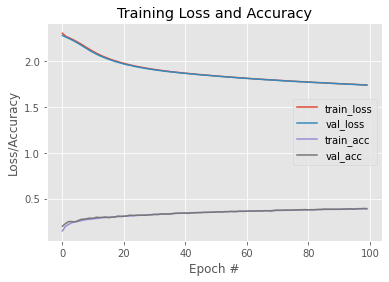

In [18]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("output.jpg")